# Лабораторная работа №1: Моделирование стандартных дискретных сигналов

Выполнили студенты гр. 1384 Тапеха Владимир Алексеевич и Лукин Евгений Юрьевич. Вариант №9.

## Цель работы

Изучить математическое описание стандартных дискретных сигналов и овладеть программными средствами их моделирования.

Цифровой сигнал — сигнал, который можно представить в виде последовательности дискретных (цифровых) значений.

Аналоговый сигнал — сигнал данных, у которого каждый из представленных параметров описывается функцией времени и непрерывным множеством возможных значений.

**Дискретное время $nT$**: Представляет собой промежуток времени, где $T$ – шаг дискретизации. Таким образом, $nT = \{0, T, 2T, \ldots, (N-1)T\}$.

**Дискретное нормированное время $n$**: Это шкала времени, нормализованная до целых чисел, где $n = \{0, 1, 2, \ldots, N-1\}$.

**Единичный цифровой импульс $\delta_d(k)$**: Это дискретная функция, определенная в конкретные моменты времени. Она равна 1 в начальный момент времени и 0 во все остальные моменты:
  $$
  \delta_d(k) =
  \begin{cases}
  1, & \text{если } k = 0 \\
  0, & \text{если } k \neq 0
  \end{cases}
  $$

**Дельта-функция $\delta(t)$**: Это непрерывная функция, которая представляет собой импульс во времени. Она становится бесконечной при значении $t = 0$ и интеграл по всей области равен 1:
  $$
  \delta(t) =
  \begin{cases}
  \infty, & t = 0 \\
  0, & t \neq 0
  \end{cases}
  $$

Формула дискретного единичного скачка представляет собой:

$$\sigma_d(k) = \begin{cases}
1, & \text{если }k \geq 0 \\
0, & \text{ecли }k < 0
\end{cases}$$

Формула аналового единичного скачка выглядит так:

$$\sigma(t) = \begin{cases}
1, &  \text{если } t > 0 \\
0.5  \text{ или не определена}, & \text{если } t = 0 \\
0, &  \text{если } t < 0
\end{cases}$$

Формула частоты:
$$
f = \frac{1}{T}
$$

Формула задержанного единичного цифрового импульса:

$$
\delta_d(k - m) =
\begin{cases}
1, &  k = m  \\
0, &  k \neq m
\end{cases}
$$

Формула задержанной экспоненты:

$$
s_1(k - m) =
\begin{cases}
a^{k - m}, & k \geq m \\
0, &  k < m
\end{cases}
$$

где $ a $ — коэффициент затухания, $ m $ — количество задержанных отсчетов.

Формула задержанного единичного скачка:

$$
\sigma_d(k - m) =
\begin{cases}
1, &  k \geq m \\
0, &  k < m
\end{cases}
$$
где $ m $ — количество задержанных отсчетов.


## Постановка задачи

С помощью программных средств провести моделирование и анализ стандартных дискретных последовательностей. Результаты подкрепить соответствующими графиками и выводами.

## Выполнение работы

Импорт необходимых библиотек.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Вынесем все константы и вычислим их исходя из варианта.

In [3]:
N_br = 9
N = 30 + N_br % 5
T = 0.0005 * (1 + N_br % 3)
a = (-1) ** N_br * (0.8 + 0.005 * (N_br % 20))
C = 1 + N_br % 5
w_0 = np.pi / (6 + N_br % 5)
m = 5 + N_br % 5

Напечатаем все вычисленные константы

In [4]:
print("Номер бригады N_br =", N_br)
print("Длина последовательности N =", N)
print("Период дискретизации T =", T)
print("Основание экспоненты a =", a)
print("Амплитуда гармонического сигнала C =", C)
print("Частота гармонического сигнала w_0 =", w_0)
print("Задержка m =", m)

Номер бригады N_br = 9
Длина последовательности N = 34
Период дискретизации T = 0.0005
Основание экспоненты a = -0.8450000000000001
Амплитуда гармонического сигнала C = 5
Частота гармонического сигнала w_0 = 0.3141592653589793
Задержка m = 9


### Задание 1.

Смоделировать единичный цифровой импульс $ \delta_d(k) $ с выводом графиков на интервале дискретного времени $nT \in [0, (N-1)T]$ и дискретного нормированного времени $n \in [0, N-1]$. Пояснить:
- взаимосвязь между дискретным и дискретным нормированным временем;
- различие между единичным цифровым импульсом и дельта-функцией.

Построим сначала графики единичного цифрового импульса на интервале дискретного времени и дискретного нормированного времени.

Для этого сначала вычислим интервалы.

In [5]:
n_int = np.arange(0, N)
nT_int = n_int * T

print("Интервал нормированного дискретного времени n_int =", n_int)
print("Интервал дискретного времени nT_int =", nT_int)

Интервал нормированного дискретного времени n_int = [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33]
Интервал дискретного времени nT_int = [0.     0.0005 0.001  0.0015 0.002  0.0025 0.003  0.0035 0.004  0.0045
 0.005  0.0055 0.006  0.0065 0.007  0.0075 0.008  0.0085 0.009  0.0095
 0.01   0.0105 0.011  0.0115 0.012  0.0125 0.013  0.0135 0.014  0.0145
 0.015  0.0155 0.016  0.0165]


После рассчитаем единичный цифровой импульс.

In [6]:
delta_d = np.zeros(N)
delta_d[0] = 1

print("Единичный цифровой импульс delta_d =", delta_d)

Единичный цифровой импульс delta_d = [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


Теперь можем построить график единичного цифрового импульса в дискретном нормированном времени.

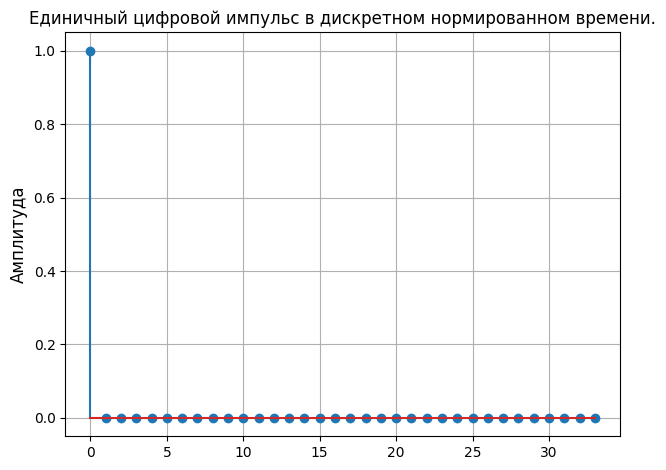

In [7]:
plt.stem(n_int, delta_d)
plt.title('Единичный цифровой импульс в дискретном нормированном времени.')
plt.ylabel('Амплитуда', fontsize=12)
plt.grid(True)


plt.tight_layout()
plt.show()

И график единичного цифрового импульса в дискретном времени.

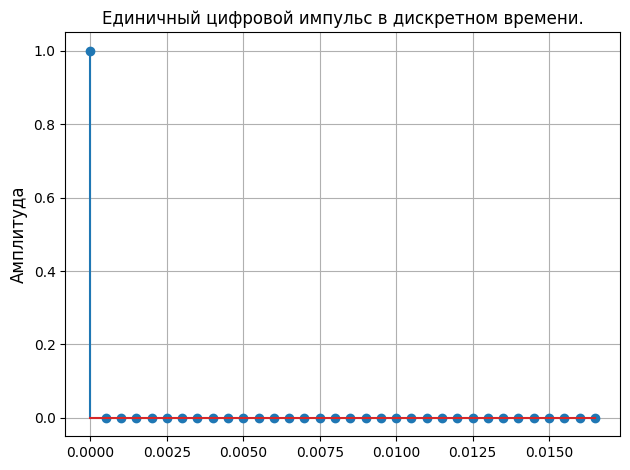

In [8]:
plt.stem(nT_int, delta_d)
plt.title('Единичный цифровой импульс в дискретном времени.')
plt.ylabel('Амплитуда', fontsize=12)
plt.grid(True)


plt.tight_layout()
plt.show()

**Пояснение:**


1. Взаимосвязь между дискретным и дискретным нормированным временем
- **Дискретное время $nT$**: Представляет собой промежуток времени, где $T$ – шаг дискретизации. Таким образом, $nT = \{0, T, 2T, \ldots, (N-1)T\}$.
- **Дискретное нормированное время $n$**: Это шкала времени, нормализованная до целых чисел, где $n = \{0, 1, 2, \ldots, N-1\}$.


То есть можно сказать, что они отличаются только шагом дискретизации и взаимосвязь между ними такая, что дискертное нормированное время - это дискретное время с шагом дискретизации равным 1.


2. Различие между единичным цифровым импульсом и дельта-функцией
- **Единичный цифровой импульс $\delta_d(k)$**: Это дискретная функция, определенная в конкретные моменты времени. Она равна 1 в начальный момент времени и 0 во все остальные моменты:
  $$
  \delta_d(k) =
  \begin{cases}
  1, & \text{если } k = 0 \\
  0, & \text{если } k \neq 0
  \end{cases}
  $$

- **Дельта-функция $\delta(t)$**: Это непрерывная функция, которая представляет собой импульс во времени. Она становится бесконечной при значении $t = 0$ и интеграл по всей области равен 1:
  $$
  \delta(t) =
  \begin{cases}
  \infty, & t = 0 \\
  0, & t \neq 0
  \end{cases},
  $$

Так, можно сказать, что единичный цифровой импульс используется в дискретных системах, а дельта-функция в непрерывных системах.

### Задание 2.

Смоделировать дискретный единичный скачок $\sigma_d(k)$ с выводом графиков на интервале дискретного времени $nT \in [0, T(N-1)]$ и дискретного нормированного времени $n \in [0, N-1]$. Пояснить:
- Соответствие между дискретным и аналоговым единичными скачками.
- Чему равна частота дискретизации дискретного единичного скачка.

Воспользуемся вычисленными интервали из прошлого задания. Поэтому сразу будем вычислять функцию единичного скачка.

In [9]:
sigma_d = np.zeros(N)
sigma_d[0:] = 1

print("Функция единичного скачка sigma_d =", sigma_d)

Функция единичного скачка sigma_d = [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Построим график единиченого скачка на дискретном нормированном интервале.

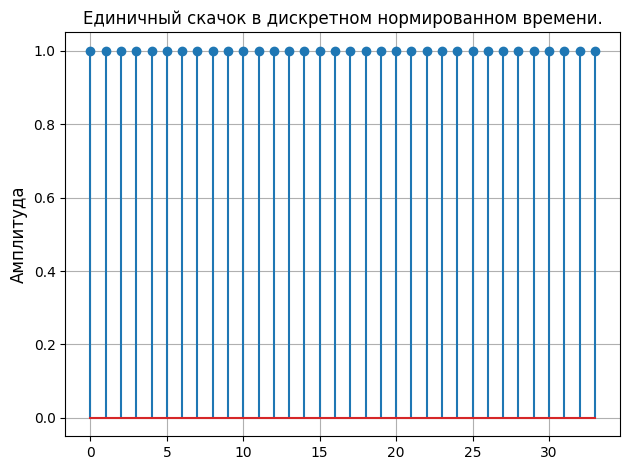

In [10]:
plt.stem(n_int, sigma_d)
plt.title('Единичный скачок в дискретном нормированном времени.')
plt.ylabel('Амплитуда', fontsize=12)
plt.grid(True)


plt.tight_layout()
plt.show()

И график единичного скачка в дискретном времени.

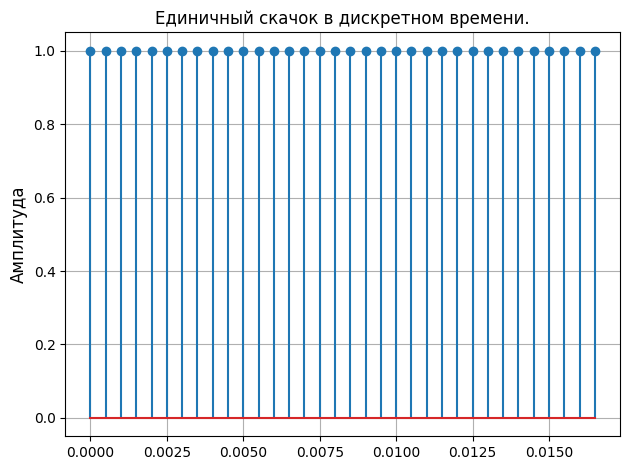

In [11]:
plt.stem(nT_int, sigma_d)
plt.title('Единичный скачок в дискретном времени.')
plt.ylabel('Амплитуда', fontsize=12)
plt.grid(True)


plt.tight_layout()
plt.show()

**Пояснение:**


1. Соответствие между дискретным и аналоговым единичным скачками.

Формула дискретного единичного скачка представляет собой:

$$\sigma_d(k) = \begin{cases}
1, & \text{если }k \geq 0 \\
0, & \text{ecли }k < 0
\end{cases}$$

А формула аналового единичного скачка выглядит так:

$$\sigma(t) = \begin{cases}
1, &  \text{если } t > 0 \\
0.5  \text{ или не определена}, & \text{если } t = 0 \\
0, &  \text{если } t < 0
\end{cases}$$

Из них видно, что дискретный единичный скачок получается путем дискретизации аналогового единичного скачка.

2. Частота дискретизации дискретного единичного скачка.

Частота дискретизации для дискретного единичного скачка определяется по формуле:
$$
f = \frac{1}{T}
$$

In [12]:
print("Частота дискретизации для дискретного единичного скачка равна f =", 1/T)

Частота дискретизации для дискретного единичного скачка равна f = 2000.0


### Задание 3.

Смоделировать дискретную экспоненциальную функцию $ s_1(k) $ с выводом графиков на интервале дискретного времени $ nT \in [0, (N-1)T] $ и дискретного нормированного времени $ n \in [0, N-1] $. Пояснить соответствие между дискретной и аналоговой экспонентами.

Вычислим экспоненциальную функцию.

In [13]:
s1_n = np.zeros(N)
s1_n = np.power(a, n_int)
print("Экспоненциальная функция в нормированном дискретном времени для n_int s1_n =\n", s1_n)

Экспоненциальная функция в нормированном дискретном времени для n_int s1_n =
 [ 1.         -0.845       0.714025   -0.60335113  0.5098317  -0.43080779
  0.36403258 -0.30760753  0.25992836 -0.21963947  0.18559535 -0.15682807
  0.13251972 -0.11197916  0.09462239 -0.07995592  0.06756275 -0.05709053
  0.0482415  -0.04076406  0.03444563 -0.02910656  0.02459504 -0.02078281
  0.01756148 -0.01483945  0.01253933 -0.01059574  0.0089534  -0.00756562
  0.00639295 -0.00540204  0.00456473 -0.00385719]


Построим график экспоненциальной функции в дискретном нормированном времени.

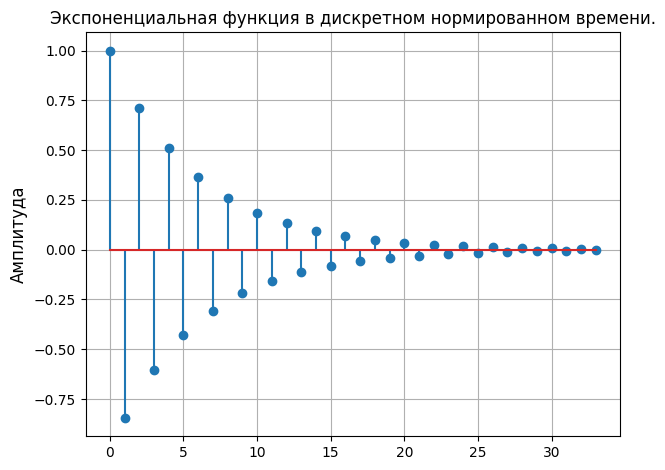

In [15]:
plt.stem(n_int, s1_n)
plt.title('Экспоненциальная функция в дискретном нормированном времени.')
plt.ylabel('Амплитуда', fontsize=12)
plt.grid(True)


plt.tight_layout()
plt.show()

Построим график экспоненциальной функции в дискретном времени.

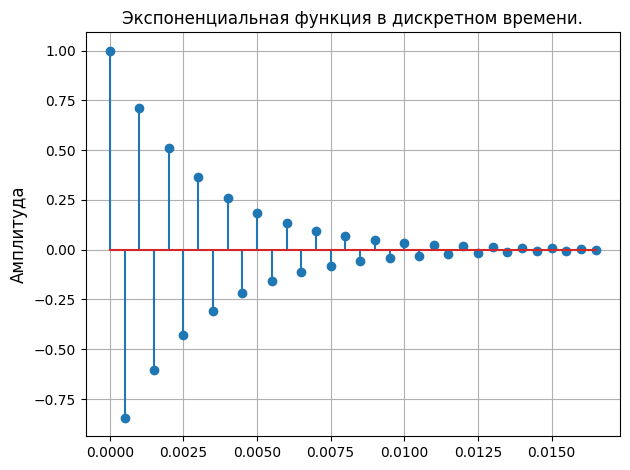

In [17]:
plt.stem(nT_int, s1_n)
plt.title('Экспоненциальная функция в дискретном времени.')
plt.ylabel('Амплитуда', fontsize=12)
plt.grid(True)

plt.tight_layout()
plt.show()

**Пояснение**

1. Соответствие между дискретной и аналоговой экспонентами заключается в том, что дискретная экспонента - это аппроксимация аналоговой экспоненты на дискретном интервале времени.

### Задание 4.

Смоделировать дискретный комплексный гармонический сигнал $s_2(k) = C \exp(j \hat{\omega_0} k)$ с выводом графиков вещественной и мнимой частей на интервале времени $ n \in [0, N-1] $ Записать данный сигнал в виде комбинации двух вещественных последовательностей.

Воспользуемся формулой Эйлера и разобъем сигнал $s_2(k)$ на комбинацию двух вещественных последовательностей:

$$s_2(k) = C \cos(\omega_0 k) + j C \sin(\omega_0 k)$$

$$s_2(k) = \cos(\frac{\pi k}{6}) + j \sin(\frac{\pi k}{6})$$

То есть вещественная($Re(k)$) и мнимая($Im(k)$) части $s_2$:
$$Re(k) = \cos(\frac{\pi k}{6}),\text{ }Im(k) = \sin(\frac{\pi k}{6})$$


Рассчитаем гармонический сигнал s2.

In [ ]:
s2 = C * np.exp(1j * w_0 * n_int)

print("Комлексный гармонический сигнал равен s2 =", s2)

Комлексный гармонический сигнал равен s2 = [ 5.00000000e+00+0.00000000e+00j  4.75528258e+00+1.54508497e+00j
  4.04508497e+00+2.93892626e+00j  2.93892626e+00+4.04508497e+00j
  1.54508497e+00+4.75528258e+00j  3.06161700e-16+5.00000000e+00j
 -1.54508497e+00+4.75528258e+00j -2.93892626e+00+4.04508497e+00j
 -4.04508497e+00+2.93892626e+00j -4.75528258e+00+1.54508497e+00j
 -5.00000000e+00+6.12323400e-16j -4.75528258e+00-1.54508497e+00j
 -4.04508497e+00-2.93892626e+00j -2.93892626e+00-4.04508497e+00j
 -1.54508497e+00-4.75528258e+00j -9.18485099e-16-5.00000000e+00j
  1.54508497e+00-4.75528258e+00j  2.93892626e+00-4.04508497e+00j
  4.04508497e+00-2.93892626e+00j  4.75528258e+00-1.54508497e+00j
  5.00000000e+00-1.22464680e-15j  4.75528258e+00+1.54508497e+00j
  4.04508497e+00+2.93892626e+00j  2.93892626e+00+4.04508497e+00j
  1.54508497e+00+4.75528258e+00j  1.53080850e-15+5.00000000e+00j
 -1.54508497e+00+4.75528258e+00j -2.93892626e+00+4.04508497e+00j
 -4.04508497e+00+2.93892626e+00j -4.75528258e+0

Построим графики.

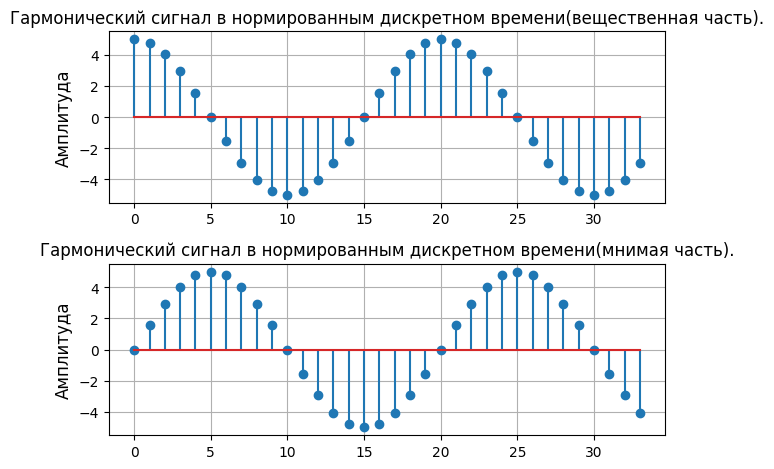

In [ ]:
plt.subplot(2, 1, 1)
plt.stem(n_int, s2.real)
plt.title('Гармонический сигнал в нормированным дискретном времени(вещественная часть).')
plt.ylabel('Амплитуда', fontsize=12)
plt.grid(True)

plt.subplot(2, 1, 2)
plt.stem(n_int, s2.imag)
plt.title('Гармонический сигнал в нормированным дискретном времени(мнимая часть).')
plt.ylabel('Амплитуда', fontsize=12)
plt.grid(True)

plt.tight_layout()
plt.show()

### Задание 5.

1. Формула задержанного единичного цифрового импульса:

$$
\delta_d(k - m) =
\begin{cases}
1, &  k = m  \\
0, &  k \neq m
\end{cases}
$$

где $ m $ — количество задержанных отсчетов.

In [ ]:
delta_d = np.zeros(N)
delta_d[m] = 1

print("Задержанный единичный цифровой импульс delta_d =", delta_d)

Задержанный единичный цифровой импульс delta_d = [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2. Формула задержанного единичного скачка:

$$
\sigma_d(k - m) =
\begin{cases}
1, &  k \geq m \\
0, &  k < m
\end{cases}
$$
где $ m $ — количество задержанных отсчетов.

In [ ]:
sigma_d = np.zeros(N)
sigma_d[m:] = 1

print("Задержанный единичный скачок sigma_d =", sigma_d)

Задержанный единичный скачок sigma_d = [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


3. Формула задержанной экспоненты:

$$
s_1(k - m) =
\begin{cases}
a^{k - m}, & k \geq m \\
0, &  k < m
\end{cases}
$$

где $ a $ — коэффициент затухания, $ m $ — количество задержанных отсчетов.

In [ ]:
s1 = np.zeros(N)
s1[m:] = C * np.power(a, (n_int[m:]))

print("Задерженная экспонента s1 =\n", s1)

Задерженная экспонента s1 =
 [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.         -1.09819733  0.92797675 -0.78414035
  0.6625986  -0.55989581  0.47311196 -0.39977961  0.33781377 -0.28545264
  0.24120748 -0.20382032  0.17222817 -0.1455328   0.12297522 -0.10391406
  0.08780738 -0.07419724  0.06269666 -0.05297868  0.04476699 -0.0378281
  0.03196475 -0.02701021  0.02282363 -0.01928597]


Построим все графики.

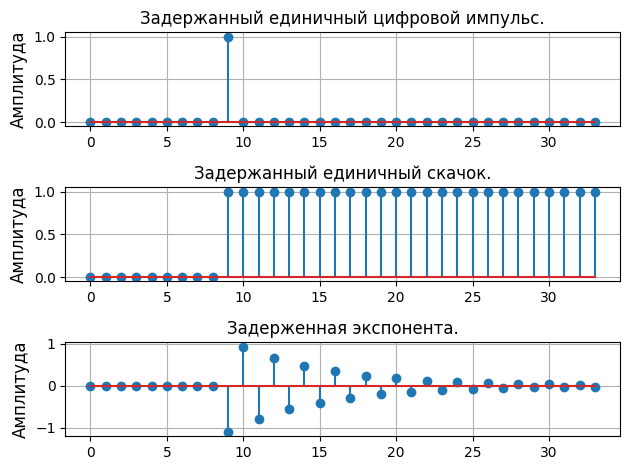

In [ ]:
plt.subplot(3, 1, 1)
plt.stem(n_int, delta_d)
plt.title('Задержанный единичный цифровой импульс.')
plt.ylabel('Амплитуда', fontsize=12)
plt.grid(True)

plt.subplot(3, 1, 2)
plt.stem(n_int, sigma_d)
plt.title('Задержанный единичный скачок.')
plt.ylabel('Амплитуда', fontsize=12)
plt.grid(True)

plt.subplot(3, 1, 3)
plt.stem(n_int, s1)
plt.title('Задерженная экспонента.')
plt.ylabel('Амплитуда', fontsize=12)
plt.grid(True)

plt.tight_layout()
plt.show()

## Выводы

Во время выполнения лабораторной работы были изучены математические модели стандартных дискретных сигналов. Исследованные сигналы включают: единичный цифровой импульс, дискретный единичный скачок, дискретную экспоненциальную функцию, дискретный комплексный гармонический сигнал, задержанный единичный цифровой импульс, задержный дискретный скачок и задержанную экспоненциальную функцию. Были приобретены практические навыки по моделированию этих сигналов с использованием программных инструментов. Все полученные результаты имеют графики с выводами и ответы на вопросы.